In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
df_global = pd.read_csv('owid-covid-data.csv',usecols=['location','date','total_cases','total_deaths','total_tests','positive_rate','people_fully_vaccinated','population']);
#df_global = pd.read_csv('owid-covid-data.csv');

country_name = 'United States';
#country_name = 'Sri Lanka';
df_country = df_global[df_global['location'] == country_name].reset_index();
#df_country.reset_index(inplace=True);

#Fix NaNs produced from empty lines
for col in ['total_cases','total_deaths','total_tests','positive_rate','people_fully_vaccinated']:
    if (np.isnan(df_country[col][0])):
        df_country.loc[0,col] = 0;
    df_country[col].fillna(method='ffill', inplace=True);

#Uncomment block below to remove data before a given start date
# start_index = df_country.index[df_country['date'] == '2020-10-01']
# print('Start index:', start_index[0])
# df_country = df_country.loc[start_index[0]::]
# df_country.reset_index(drop=True, inplace=True);

df_country['total_recovered'] = 0;

for col in ['total_cases','total_deaths','total_tests','people_fully_vaccinated','population']:
    df_country[col] = pd.to_numeric(df_country[col], downcast="integer");


print(df_country)

      index       location        date  total_cases  total_deaths  \
0    157222  United States  2020-01-22            1             0   
1    157223  United States  2020-01-23            1             0   
2    157224  United States  2020-01-24            2             0   
3    157225  United States  2020-01-25            2             0   
4    157226  United States  2020-01-26            5             0   
..      ...            ...         ...          ...           ...   
769  157991  United States  2022-03-01     79091361        952423   
770  157992  United States  2022-03-02     79143716        954518   
771  157993  United States  2022-03-03     79196008        956261   
772  157994  United States  2022-03-04     79250509        958144   
773  157995  United States  2022-03-05     79265726        958437   

     total_tests  positive_rate  people_fully_vaccinated  population  \
0              0          0.000                        0   332915074   
1              0          0

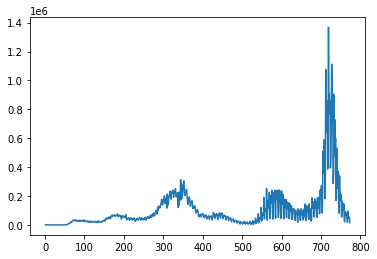

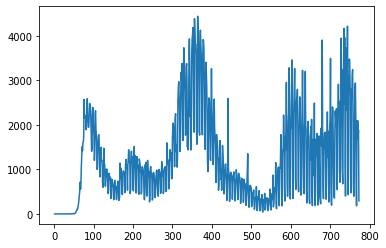

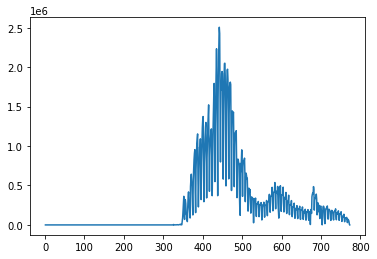

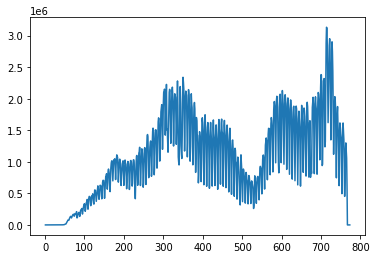

332915074

In [22]:
plt.plot(df_country['total_cases'].diff())
plt.show()

plt.plot(df_country['total_deaths'].diff())
plt.show()

plt.plot(df_country['people_fully_vaccinated'].diff())
plt.show()

plt.plot(df_country['total_tests'].diff())
plt.show()

df_country['population'][0]

In [23]:
popN = df_country['population'][0];
country_str = country_name.lower().replace(" ", "");
f = open("csv_data/" + country_str + ".txt", "w")
f.write(str(popN) + "\n")
f.close()

df_country.to_csv('csv_data/' + country_str + '.txt', mode='a', header=False, index=False, \
                  columns=['total_cases', 'total_recovered', 'total_deaths'], sep=' ')

df_country.to_csv('csv_data/' + country_str + '_vaccinations.txt', mode='a', header=False, index=False, \
                  columns=['people_fully_vaccinated'], sep=' ')

df_country.to_csv('csv_data/' + country_str + '_testing.txt', mode='a', header=False, index=False, \
                  columns=['total_tests'], sep=' ')

In [24]:
IFR_index1 = df_country.index[df_country['date'] == '2020-06-01']
IFR_index2 = df_country.index[df_country['date'] == '2021-01-01']
IFR_index3 = df_country.index[df_country['date'] == '2021-04-01']
IFR_index4 = df_country.index[df_country['date'] == '2021-12-01']
print(IFR_index1)
print(IFR_index2)
print(IFR_index3)
print(IFR_index4)

Int64Index([131], dtype='int64')
Int64Index([345], dtype='int64')
Int64Index([435], dtype='int64')
Int64Index([679], dtype='int64')
